<a href="https://colab.research.google.com/github/widyamelia26/Facial-Emotion-Recognition/blob/main/Emosi_EfficientNetb0_(48%2C81_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash

# Check if the dataset already exists
if test -e "emotion-detection-fer.zip"; then
    rm -rf emotion-detection-fer.zip ./train ./test
    kaggle datasets download -d ananthu017/emotion-detection-fer
    unzip emotion-detection-fer.zip
else
    kaggle datasets download -d ananthu017/emotion-detection-fer
    unzip emotion-detection-fer.zip
fi

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0

Archive:  emotion-detection-fer.zip
  inflating: test/angry/im0.png      
  inflating: test/angry/im1.png      
  inflating: test/angry/im10.png     
  inflating: test/angry/im100.png    
  inflating: test/angry/im101.png    
  inflating: test/angry/im102.png    
  inflating: test/angry/im103.png    
  inflating: test/angry/im104.png    
  inflating: test/angry/im105.png    
  inflating: test/angry/im106.png    
  inflating: test/angry/im107.png    
  inflating: test/angry/im108.png    
  inflating: test/angry/im109.png    
  inflating: test/angry/im11.png     
  inflating: test/angry/im110.png    
  inflating: test/angry/im111.png    
  inflating: test/angry/im112.png    
  inflating: test/angry/im113.png    
  inflating: test/angry/im114.png    
  inflating: test/angry/im115.png    
  inflating: test/angry/im116.png    
  inflating: test/angry/im117.png    
  inflating: test/angry/im118

100%|██████████| 65.2M/65.2M [00:03<00:00, 17.7MB/s]


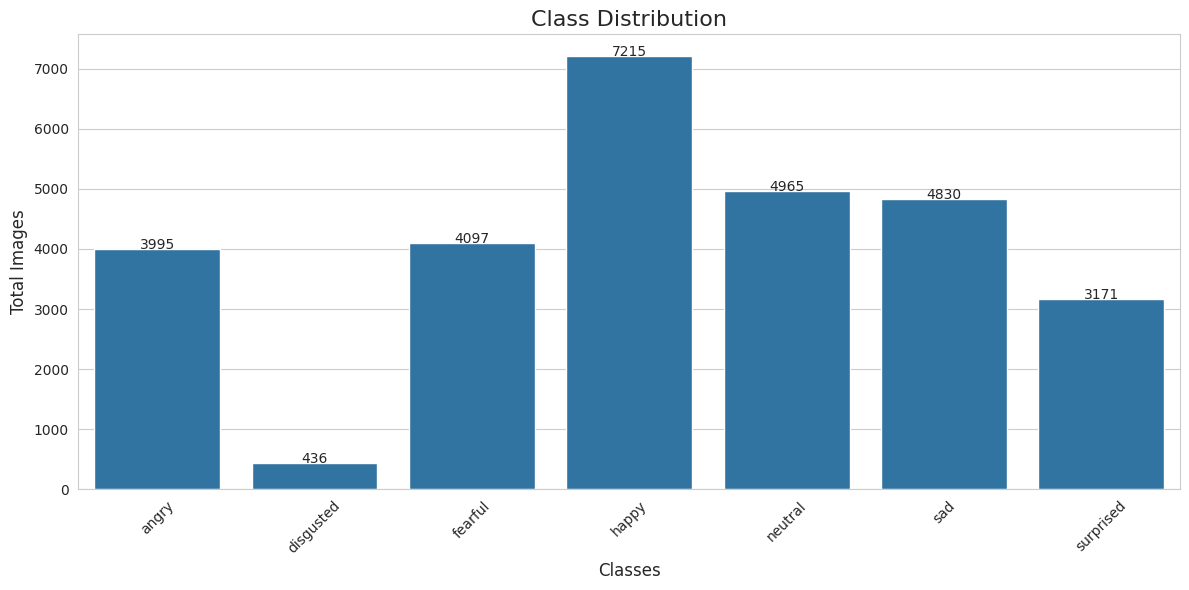

In [ ]:
import glob

import matplotlib.pyplot as plt
import seaborn as sns


train_path = "/content/train"
test_path = "/content/test"
class_names = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]
class_distribution = {}

# Put image paths to dictionary using class names as keys.
for class_name in class_names:
    class_distribution[class_name] = len(glob.glob(f"{train_path}/{class_name}/*"))

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))

plt.title("Class Distribution", fontsize=16)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Total Images", fontsize=12)
plt.xticks(rotation=45)

# Add value labels of each bar.
for index, value in enumerate(class_distribution.values()):
    plt.text(index, value, str(value), ha="center", fontsize=10)

plt.tight_layout()
plt.show()

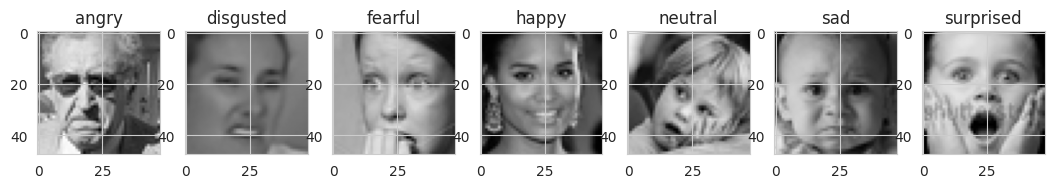

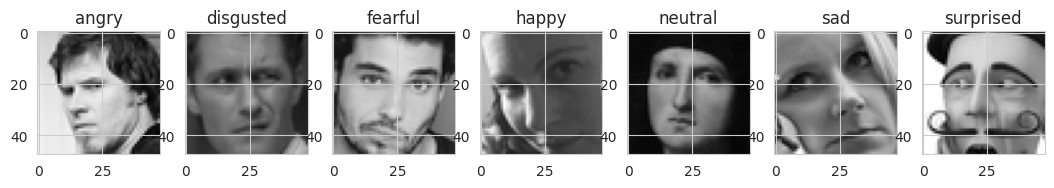

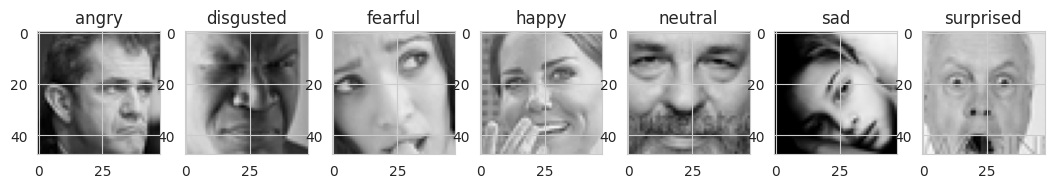

In [ ]:
import cv2
import numpy as np


def plot_sample_images():
    fig, axis = plt.subplots(1, 7, figsize=[13, 15])

    for index, (class_name, count) in enumerate(class_distribution.items()):
        # Randomly choose images to plot.
        random_index = np.random.randint(0, count)
        img_read = cv2.imread(
            glob.glob(f"{train_path}/{class_name}/*")[random_index]
        )

        axis[index].imshow(img_read)
        axis[index].set_title(class_name)

# Plot several samples of each class.
for i in range(0, 3):
    plot_sample_images()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Data generator for traning and validation.
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    #brightness_range=[0.7,1.3],
    validation_split=0.2 # 20% of images to be used for validation.
)

validation_data_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # 20% of images to be used for validation.
)

train_generator = train_data_generator.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=64,
    class_mode="categorical",
    subset="training",
)

validation_generator = validation_data_generator.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=64,
    class_mode="categorical",
    subset="validation",
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
# Data generator for evaluation.
test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory(
    test_path,
    target_size=(48, 48),
    batch_size=64,
    class_mode="categorical",
    shuffle = False  # Keep this False for confusion matrix.
)

Found 7178 images belonging to 7 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

input_shape = (48, 48, 3)

base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
    )

for layer in base_model.layers[:-4]:
        layer.trainable = False

# Buat model
model = Sequential(layers=[
    tf.keras.layers.InputLayer(input_shape=input_shape)])
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))

model.summary()
# Gambar flowchart dari model
# plot_model(model, to_file='efficientNetB0.png', show_shapes=True, show_layer_names=True)

# # Menampilkan flowchart dalam notebook
# img = plt.imread('cnn_model.png')
# plt.imshow(img)
# plt.axis('off')
# plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 2, 2, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 2, 2, 1280)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 5120)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 5120)                │          20,480 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │         163,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,236,650 (16.16 MB)

 Trainable params: 589,447 (2.25 MB)

 Non-trainable params: 3,647,203 (13.91 MB)

In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


model.compile(
    optimizer='Adam',
    loss=categorical_crossentropy,
    metrics=["accuracy"]
)

# Define callbacks.
early_stopping = EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True,verbose=1)
checkpoint = ModelCheckpoint("emotion_detection_model.keras", monitor="val_accuracy", save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=1e-10, verbose=1)

# Train the model.
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, checkpoint, reduce_lr]
    )

# Determine at which epoch early stopping occurred
stopped_epoch = len(history.history['accuracy'])
print(f"Training stopped at epoch: {stopped_epoch}")

Epoch 1/50
356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.2458 - loss: 1.8181
Epoch 1: val_accuracy improved from -inf to 0.25135, saving model to emotion_detection_model.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 81s 155ms/step - accuracy: 0.2458 - loss: 1.8180 - val_accuracy: 0.2513 - val_loss: 1.8100 - learning_rate: 0.0010
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.2491 - loss: 1.8163
Epoch 2: val_accuracy did not improve from 0.25135
359/359 ━━━━━━━━━━━━━━━━━━━━ 38s 103ms/step - accuracy: 0.2491 - loss: 1.8163 - val_accuracy: 0.2513 - val_loss: 1.8102 - learning_rate: 0.0010
Epoch 3/50
356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.2573 - loss: 1.8114
Epoch 3: val_accuracy did not improve from 0.25135
359/359 ━━━━━━━━━━━━━━━━━━━━ 37s 102ms/step - accuracy: 0.2572 - loss: 1.8114 - val_accuracy: 0.2513 - val_loss: 1.8100 - learning_rate: 0.0010
Epoch 4/50
356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.2515 - loss: 1.8095
Epoch 4: val_accur

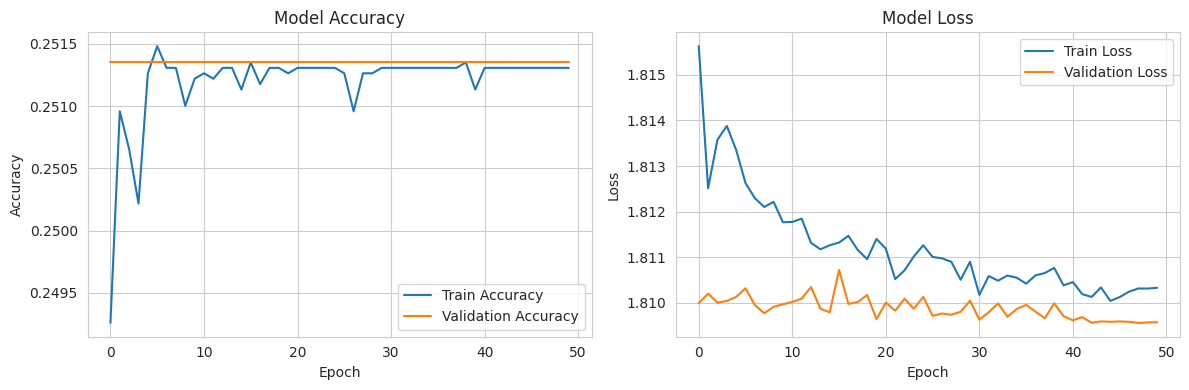

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step


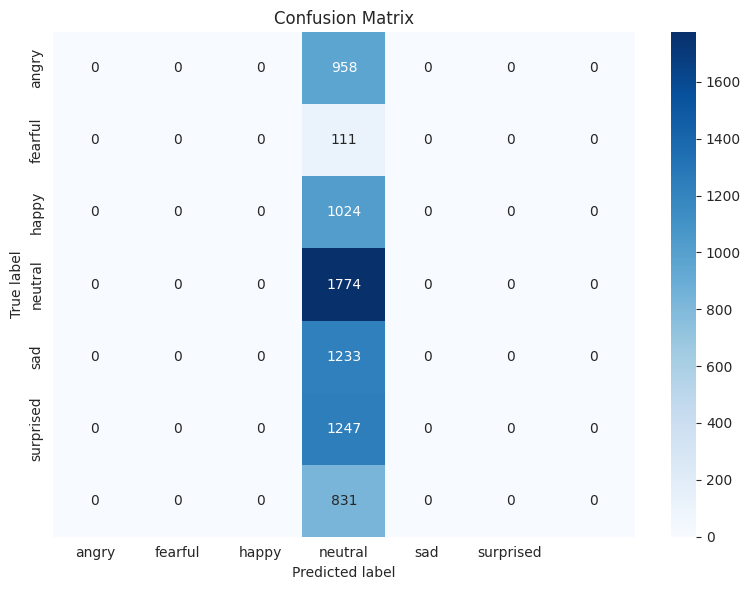

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Nama-nama kelas emosi
class_names = ["angry", "fearful", "happy", "neutral", "sad", "surprised"]

# Peroleh true labels dari test generator
true_labels = test_generator.classes

# Reset test generator sebelum prediksi
test_generator.reset()

# Dapatkan prediksi model pada data test
predicted = model.predict(test_generator)
predicted_labels = np.argmax(predicted, axis=1)

# Hitung confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

## Using Transfer Learning

### VGGNet

### ResNet

### ImageNet